code for https://www.kaggle.com/competitions/cv2023spring

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
from torch import nn

from torch.utils.data import random_split, Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, RandomApply
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip, GaussianBlur, RandomChoice
from torchvision.io import read_image

# скачать данные и посмотреть и почистить

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle/"

In [ ]:
!kaggle competitions download -c cv2023spring

cv2023spring.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip cv2023spring.zip

In [ ]:
classes = pd.read_csv('classes.csv')
classes = list(classes['pizza_type'])
trcsv = pd.read_csv('train.csv')
trcsv.drop('id', axis=1, inplace=True)
trcsv

,image_name,label
0,train_0000.jpg,0
1,train_0001.jpg,0
2,train_0002.jpg,0
3,train_0003.jpg,0
4,train_0004.jpg,0
...,...,...
6419,train_6419.jpg,45
6420,train_6420.jpg,45
6421,train_6421.jpg,45
6422,train_6422.jpg,45


##похоже что легче всего удалять мусор руками

посмотреть все train_****

In [ ]:
#it = iter(range(0,6424,100))

In [ ]:
'''
figure = plt.figure(figsize=(17, 17))#figsize=(8, 8)
cols, rows = 10, 10
n = next(it)
''''''
for i in range(1, cols * rows + 1):
    #sample_idx = torch.randint(6424, size=(1,)).item() # Случайный индекс из датасета
    #img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    img =
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(np.moveaxis(img.numpy(),0,-1))
plt.show()''''''
for i in range(1,101):
  figure.add_subplot(rows, cols, i)
  c = n+i-1
  if c <6424:
    img = plt.imread(f'train_196/train_196/train_{c:04d}.jpg')
  plt.title(f'{c:04d}')
  plt.axis("off")
  plt.imshow(img)

plt.show()'''

'\nfigure = plt.figure(figsize=(17, 17))#figsize=(8, 8)\ncols, rows = 10, 10\nn = next(it)\n\nfor i in range(1, cols * rows + 1):\n    #sample_idx = torch.randint(6424, size=(1,)).item() # Случайный индекс из датасета\n    #img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета\n    img = \n    figure.add_subplot(rows, cols, i)\n    plt.title(labels[label])\n    plt.axis("off")\n    plt.imshow(np.moveaxis(img.numpy(),0,-1))\nplt.show()\nfor i in range(1,101):\n  figure.add_subplot(rows, cols, i)\n  c = n+i-1\n  if c <6424:\n    img = plt.imread(f\'train_196/train_196/train_{c:04d}.jpg\')\n  plt.title(f\'{c:04d}\')\n  plt.axis("off")\n  plt.imshow(img)\n\nplt.show()'

In [ ]:
trash = [92,216,499,804,863,1141,1916,2859,3086,3354,3931,5031,
         5128,5140,5162,5175,5238,5225]+[3411,3415,3420,910,4036,330,3472,5067,5156,5173]#all common classes
trcsv.drop(trash, inplace=True)
for i in trash:
  os.remove(f'train_196/train_196/train_{i:04d}.jpg')

In [ ]:
typical = []
for i in range(46):
  l = trcsv[trcsv['label']==i].index
  typical.append([np.random.randint(l[0],l[-1]+1) for i in range(4)])

In [ ]:
figure = plt.figure(figsize=(5,60))#figsize=(8, 8)
cols, rows = 4, 46

for i in range(1,4*46+1):
  figure.add_subplot(rows, cols, i)
  cl = (i-1)//4
  el = (i-1)%4
  img = plt.imread(f'train_196/train_196/train_{typical[cl][el]:04d}.jpg')
  plt.title(f'{cl}')
  plt.axis("off")
  plt.imshow(img)

plt.show()

In [ ]:
trcsv.loc[451,'label']=37
trcsv.loc[550,'label']=15
trcsv.loc[700,'label']=33
trcsv.loc[724,'label']=7
trcsv.loc[752,'label']=11
trcsv.loc[760,'label']=45
trcsv.loc[1243,'label']=22
trcsv.loc[1428,'label']=45
trcsv.loc[1580,'label']=22
trcsv.loc[1733,'label']=22
trcsv.loc[2047,'label']=1
trcsv.loc[2136,'label']=34
trcsv.loc[2424,'label']=22
trcsv.loc[2434,'label']=34
trcsv.loc[2580,'label']=23
trcsv.loc[3280,'label']=33
trcsv.loc[3285,'label']=17
trcsv.loc[3442,'label']=11
trcsv.loc[3449,'label']=37
trcsv.loc[3666,'label']=21
trcsv.loc[3811,'label']=22
trcsv.loc[4764,'label']=20
trcsv.loc[5077,'label']=22
trcsv.loc[5092,'label']=5
trcsv.loc[5226,'label']=5
trcsv.loc[5228,'label']=34
trcsv.loc[5229,'label']=22
trcsv.loc[5244,'label']=34
trcsv.loc[5265,'label']=34
trcsv.loc[5338,'label']=5
trcsv.loc[5347,'label']=5
trcsv.loc[5352,'label']=11
trcsv.loc[5575,'label']=4
trcsv.loc[5816,'label']=38

In [ ]:
cha = [451, 550, 700, 724, 752, 760, 1243, 1428,1580, 1733, 2047, 2136,
       2424, 2580, 3280, 3285, 3449, 3442, 3666, 3811, 4764 , 5077,
       5092, 5226, 5228, 5229, 5244, 5265, 5338, 5347, 5352, 5575, 5816]

figure = plt.figure(figsize=(8, 8))#figsize=(8, 8)
cols, rows = 6, 6
for i in range(1,(len(cha)+1)):
  figure.add_subplot(rows, cols, i)
  c = i-1
  img = plt.imread(f'train_196/train_196/train_{cha[c]:04d}.jpg')
  plt.title(f'{cha[c]}')
  plt.axis("off")
  plt.imshow(img)

plt.show()

In [ ]:
trcsv.reset_index(drop=True, inplace=True)

##распределение классов

0      51
1     144
2      48
3      85
4     416
37    416
15    171
33    372
7     266
5     288
11    158
45    245
6      19
22    757
8       2
9     102
10     25
12    124
13    102
14    198
34    220
16    127
17    190
18    124
23    201
19     26
20    215
21     15
24    101
25      6
26     15
27     69
28     36
29     54
30      4
31      1
32    140
35     68
36     11
38    248
39     63
40    153
41     45
42     48
43     81
44    146
Name: label, dtype: int64


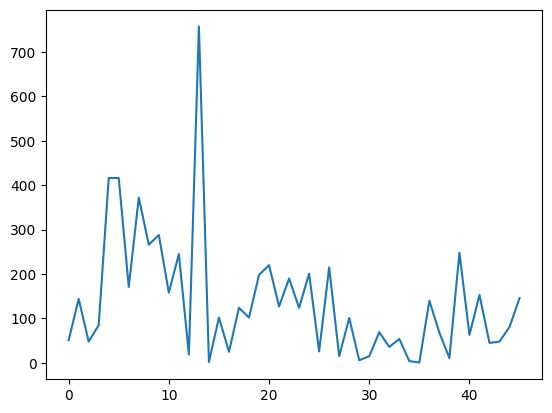

In [ ]:
l = trcsv['label'].value_counts(sort=False)
print(l)
a = l[l<100]
b= l[l<10]
a = list(a.index)
b = list(b.index)
#тут нужно вытащить по номеру класса номера его картинок
la = trcsv[[trcsv['label'][i] in a for i in range(len(trcsv))]]
lb = trcsv[[trcsv['label'][i] in b for i in range(len(trcsv))]]

plt.plot(list(l))
plt.show()

In [ ]:
print(a)

In [ ]:
print(b)

аугментация для малых классов
https://pytorch.org/vision/stable/transforms.html

In [ ]:
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip, GaussianBlur, RandomChoice, ToTensor
import matplotlib.image

In [ ]:
#6397 и можно класть в
l = len(trcsv)
'''
RandomRotation(degrees[, interpolation, ...])
RandomHorizontalFlip([p])
RandomVerticalFlip([p])
GaussianBlur(kernel_size[, sigma])
RandomApply(transforms[, p])'''
#df = pd.DataFrame(columns=['image_name','label'])
df = trcsv
for t in lb.itertuples():
  for i in range(5):
    img = plt.imread('train_196/train_196/'+t[1])
    img = ToTensor()(img)
    img = RandomChoice([RandomHorizontalFlip(0.5), RandomVerticalFlip(0.5)])(img)
    img = RandomRotation(180)(img)
    img = GaussianBlur(kernel_size=(5, 9))(img)

    img = img.permute(1, 2, 0).numpy()
    l = len(df)
    #print(img.max())
    img[img>1]=1.0
    #print(img.max())
    matplotlib.image.imsave('train_196/train_196/' + f'train_{l:04d}.jpg', img)#!!!!!!!!!!!!!!!!!!!!!
    df.loc[l] = {'image_name':f'train_{l:04d}.jpg', 'label': t[2]}

for t in la.itertuples():
  for i in range(2):
    img = plt.imread('train_196/train_196/'+t[1])
    img = ToTensor()(img)
    img = RandomChoice([RandomHorizontalFlip(0.5), RandomVerticalFlip(0.5)])(img)
    img = RandomRotation(180)(img)
    img = GaussianBlur(kernel_size=(5, 9))(img)

    img = img.permute(1, 2, 0).numpy()
    l = len(df)
    #print(img.max())
    img[img>1]=1.0
    #print(img.max())
    #print(img.shape)
    matplotlib.image.imsave('train_196/train_196/'+ f'{l:04d}.jpg', img)#!!!!!!!!!!!!!!!!!!!!!
    df.loc[l] = {'image_name':f'{l:04d}.jpg', 'label': t[2]}

In [ ]:
df

In [ ]:
l = df['label'].value_counts(sort=False)
print(l)
len(df)

In [ ]:
'''
img = plt.imread(f'train_196/train_196/train_{3333:04d}.jpg')
img = ToTensor()(img)
img = RandomChoice([RandomHorizontalFlip(0.5), RandomVerticalFlip(0.5)], p=[0.5,0.5])(img)
img = RandomRotation(180)(img)
img = GaussianBlur(kernel_size=(5, 9))(img)

img = img.permute(1, 2, 0).numpy()
matplotlib.image.imsave('1.jpg', img)
plt.imshow(img)'''

In [ ]:
'''
#check if ok
#l = range(6397,len(trcsv))
figure = plt.figure(figsize=(6, 6))#figsize=(8, 8)
cols, rows = 4, 4

for i, el in enumerate(l):
  figure.add_subplot(rows, cols, i+1)
  img = plt.imread(f'train_196/train_196/train_{el:04d}.jpg')
  plt.title(f'{el:04d}')
  plt.axis("off")
  plt.imshow(img)

plt.show()'''

##делаем датасет

In [ ]:
class pizzadata(Dataset):
    """Pizza dataset."""

    def __init__(self, df, root_dir='', transform=None):
        """
        Args:
            csv_file (string): Путь к CSV-файлу с разметкой.
            root_dir (string): Корневая директория и изображениями.
            transform (callable, optional): Необязательные трансформации, применяемые к изображениями.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        #image = plt.imread(img_name)
        image = read_image(img_name)
        ind = int(self.df.iloc[idx, 1])
        sample = {'image': image, 'ind': ind}

        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

In [ ]:
tc = 2136
a = [f'test_{i:04d}.jpg'for i in range(tc)]
d = pd.DataFrame(a)
d[1] = [0]*tc

# finetuning <a href="https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html" target="_blank">ResNet50</a> + fullyconnected
from <a href="https://pytorch.org/vision/stable/models.html" target="_blank">here</a>


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

weights = ResNet50_Weights.DEFAULT
'''
model = resnet50(weights=weights)
model.to(device)
model.train()'''

In [ ]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            resnet50(weights=weights),
            nn.Linear(1000, 46),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
'''from torchvision.models import regnet_y_8gf, RegNet_Y_8GF_Weights

weights = RegNet_Y_8GF_Weights.DEFAULT

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            regnet_y_8gf(weights=weights),
            nn.Linear(1000, 46),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits'''

In [ ]:
#https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_v2_s.html
'''from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights

weights = EfficientNet_V2_S_Weights.DEFAULT

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            efficientnet_v2_s(weights=weights),
            nn.Linear(1000, 46),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits'''

In [ ]:
def modelreset():
  model = NeuralNetwork().to(device)
  model.train()
  return model

model = modelreset()

Downloading: "https://download.pytorch.org/models/regnet_y_8gf-dc2b1b54.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_8gf-dc2b1b54.pth
100%|██████████| 151M/151M [00:00<00:00, 159MB/s]


In [ ]:
trs = Compose([RandomChoice([RandomHorizontalFlip(0.5), RandomVerticalFlip(0.5)]),RandomRotation(180), GaussianBlur(kernel_size=(5, 9))])
#https://pytorch.org/vision/main/generated/torchvision.transforms.AugMix.html
trs = Compose( [weights.transforms(), RandomApply([trs], p=0.75)])

In [ ]:
df = {'train': trcsv, 'test': d}
ds = {x: pizzadata(df[x], f'{x}_196/{x}_196/', transform=trs) for x in ['train', 'test']}
#need val
a = random_split(ds['train'], [len(ds['train'])-700, 700])
ds['train'], ds['val'] = a
dataloaders = {x: DataLoader(ds[x], batch_size=64, shuffle=True) for x in ['train','val']}
outdl = DataLoader(ds['test'], batch_size=64, shuffle=False)

In [ ]:
len(ds['train'])+len(ds['val'])

8005

##train func

In [ ]:
def train_loop(model, dataloader, loss_fn, optimizer):
    torch.cuda.empty_cache()
    model.train(True)
    size = len(dataloader.dataset)
    for batch, data in enumerate(dataloader):
        #move
        X = data['image'].to(device)
        y = data['ind'].to(device)
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()


        if batch % 20 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(model, dataloader, loss_fn, optimizer):
    model.train(False)
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for data in dataloader:
            #move
            X = data['image'].to(device)
            y = data['ind'].to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.int).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    #accs.append(100*correct)

In [ ]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:<32>"

#training

In [ ]:
#x2
loss_fn = nn.CrossEntropyLoss()#focal loss Это круто

def opt(learning_rate = 1e-3, l=[1,3,5,8]):
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, l, gamma=0.1)
  return optimizer, scheduler

def epoch(t,optimizer,scheduler):
  print(f"Epoch {t+1}\n-------------------------------")
  train_loop(model, dataloaders['train'], loss_fn, optimizer)
  test_loop(model, dataloaders['val'], loss_fn, optimizer)
  torch.save(model.state_dict(), f"e{(t+1):02d}.pt")
  scheduler.step()

In [ ]:
'''state_dict = torch.load("e26.pt")
model.load_state_dict(state_dict)'''

<All keys matched successfully>

In [ ]:
'''test_loop(model, dataloaders['val'], loss_fn, opti)'''

In [ ]:
model = modelreset()

In [ ]:
opti,schu = opt(5*1e-4, [3,5,8])
for t in range(10):
    epoch(t,opti,schu)
opti,schu = opt(1e-4, [3,5,8])
for t in range(10,20):
    epoch(t,opti,schu)
opti,schu = opt(1e-5, [3,5,8])
for t in range(20,30):
    epoch(t,opti,schu)
'''
opti,schu = opt(1e-6, [2,4,6,8])
for t in range(20,30):
    epoch(t,opti,schu)'''
print("Done!")
'''
print('TEST:')
test_loop(model, dataloaders['val'], loss_fn, opti)'''



In [ ]:
#change val+
opti,schu = opt(1e-6, [1,3])
for t in range(5):
    epoch(t,opti,schu)
print("Done!")

##догонка

###auto trash finder

In [ ]:
#for finding bad data
w = pizzadata(trcsv, f'train_196/train_196/', transform=trs)
#w = DataLoader(w, batch_size=64, shuffle=False)

In [ ]:
model.train(False)
sh = pd.DataFrame(columns=['image_name','pred','real'])
with torch.no_grad():
  for i, data in enumerate(w):
    imgn = trcsv['image_name'][i]
    X = data['image'].to(device)
    y = data['ind']
    pred = model(X.unsqueeze(0)).to('cpu')
    pred = pred.argmax(1)

    #(pred.argmax(1) == y).type(torch.int).sum().item()
    if (pred!= y):
      sh.loc[len(sh)] = {'image_name': imgn, 'pred': pred.item() ,'real':y}
    #print(pred.shape)
    #print(type((pred.argmax(1)).type(torch.float).numpy()))

print('done')

###auto class finder

In [ ]:
model.train(False)
ch = pd.DataFrame(columns=['image_name','pred'])
with torch.no_grad():
  for i, el in enumerate(cha):
    img_name = f'train_196/train_196/train_{el:04d}.jpg'
    image = read_image(img_name)
    image = trs(image)
    X = image.to(device)
    pred = model(X.unsqueeze(0)).to('cpu')
    pred = pred.argmax(1).item()
    ch.loc[len(ch)] = {'image_name': el, 'pred': pred }
    #print(pred.shape)
    #print(type((pred.argmax(1)).type(torch.float).numpy()))

print('done')

In [ ]:
ch

,image_name,pred
0,451,37
1,550,42
2,700,33
3,724,7
4,752,38
5,760,45
6,1243,22
7,1428,45
8,1580,22
9,1733,23


In [ ]:
figure = plt.figure(figsize=(17, 17))#figsize=(8, 8)
cols, rows = 10, 10
'''
for i in range(1, cols * rows + 1):
    #sample_idx = torch.randint(6424, size=(1,)).item() # Случайный индекс из датасета
    #img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    img =
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(np.moveaxis(img.numpy(),0,-1))
plt.show()'''
for i in range(len(sh)):
  figure.add_subplot(rows, cols, i+1)
  c  = sh['image_name'][i]
  img = plt.imread('train_196/train_196/'+c)
  plt.title(f"{c[-8:-4]}:{ sh['pred'][i] },{ sh['real'][i] }")
  plt.axis("off")
  plt.imshow(img)

plt.show()

#out

In [ ]:
torch.cuda.empty_cache()
model.train(False)
out = pd.DataFrame()
size = len(outdl.dataset)
out['id']=range(size)
out['label']=['a']*size
num_batches = len(outdl)
with torch.no_grad():
  for i, data in enumerate(outdl):
    X = data['image'].to(device)
    pred = model(X).to('cpu')
    #print(pred.shape)
    #print(type((pred.argmax(1)).type(torch.float).numpy()))
    out['label'][i*64 : i*64+64 ] = pred.argmax(1).type(torch.int).numpy()

print('done')

In [ ]:
out

In [ ]:
out.to_csv('Козырева_елизавета.csv', index=False, header=True)

#save or load

In [ ]:
torch.save(model.state_dict(), "model.pt")

In [ ]:
new_model = NeuralNetwork().eval()
state_dict = torch.load("model.pt")
new_model.load_state_dict(state_dict)